### Current Topics in main:

- Comparison dom vs int
- each Top 5 Variants

statistical analysis

- Head + description of column names (dom/)
- EDA (dom)
    - add: view_events_per_time-graph
- BPMN (dom)
- Process Tree (dom)
- (petri net) (dom)
- DFG (dom)

Process duration

- avg duration of whole process (dom)
- avg duration of each activity (dom)
- total durations of each activity (dom)
- unexpected behaviour : saved by employee (dom)

bottleneck (dom)

- dfg graph with durations
- insights from dfg
- insights from disco
- additonal remarks → unexpexted behaviour

rejected applications

- amount of rejection total (dom)
- amount of rejections based on role (dom)
- boxplot rejquested amount of rejected delcarations by role (dom)
- boxplot rejquested amount of approved delcarations by role (dom)
- Distribution of requested amount of rejected vs approved cases (dom)
---

# Introduction


# Methodology

- Start with EDA, define dataset used further.
- Understand Process by building generalized process model.

# Exploratory Data Analysis (I)

The process of analyzing log files and extracting valuable insights is a critical aspect of process mining. In this chapter, 
we delve into the realm of Exploratory Data Analysis (EDA) to gain a comprehensive understanding of the dataset containing permits and declarations made for international/domestic travels at a Dutch university. 
EDA serves as the foundation for uncovering patterns, identifying anomalies, and providing valuable feedback on the underlying process.

The objective of this chapter is to explore the dataset through various statistical and visual techniques, enabling us to unravel hidden trends and relationships within the data.
By conducting a thorough EDA, we aim to gain insights that will inform our analysis and contribute to optimizing the travel declaration process.

Throughout this chapter, we will guide you through the steps involved in EDA, starting with importing and preparing the dataset for analysis. 
We will then proceed to calculate descriptive statistics, visualize the data, and explore relationships between variables. 
By identifying patterns and anomalies, we will shed light on potential areas of improvement within the process.

The findings of this EDA will serve as a valuable foundation for subsequent analysis and further investigations. By understanding the dataset and uncovering its nuances, we can provide feedback on the process, 
recommend improvements, and make informed decisions based on the knowledge obtained.

In [5]:
import pm4py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import networkx as nx
%matplotlib inline
# to improve readibility we will surpress warnings out of final report
warnings.filterwarnings('ignore')

In [6]:
domestic_logs_path = 'data/DomesticDeclarations.xes'
international_logs_path = 'data/InternationalDeclarations.xes'

log_d = pm4py.read_xes(domestic_logs_path)
log_i = pm4py.read_xes(international_logs_path)

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

Domestic declaration dataset contains of 10,500 traces whereas international of 6,449.

In [60]:
# print(f'Domestic declarations dataset: {len(log_d):,} rows')
# print(f'{"Column":<35} {"Unique values":<15} {"Missing Values":<15} {"First 2 values":<10}')
# print('-'*130)
# for column in log_d.columns:
#     # pretty print column name count of it unique values and count of null values
#     print(f'{column:<35} {len(log_d[column].unique()):<15,} {log_d[column].isnull().sum():<15} {list(log_d[column].unique())[:2]}')
    
    
# rewrite it to be pretty printed in one column
print(f'Domestic declarations dataset: {len(log_d):,} rows')
print('-'*100)
for column in log_d.columns:
    print(f'Column: {column} \n Unique values: {len(log_d[column].unique()):<15,}\n Missing Values: {log_d[column].isnull().sum()}\n First 2 values: {list(log_d[column].unique())[:2]}')
    print('-'*100)


Domestic declarations dataset: 56,437 rows
----------------------------------------------------------------------------------------------------
Column: id 
 Unique values: 56,437         
 Missing Values: 0
 First 2 values: ['st_step 86794_0', 'st_step 86793_0']
----------------------------------------------------------------------------------------------------
Column: org:resource 
 Unique values: 2              
 Missing Values: 0
 First 2 values: ['STAFF MEMBER', 'SYSTEM']
----------------------------------------------------------------------------------------------------
Column: concept:name 
 Unique values: 17             
 Missing Values: 0
 First 2 values: ['Declaration SUBMITTED by EMPLOYEE', 'Declaration FINAL_APPROVED by SUPERVISOR']
----------------------------------------------------------------------------------------------------
Column: time:timestamp 
 Unique values: 45,403         
 Missing Values: 0
 First 2 values: [Timestamp('2017-01-09 08:49:50+0000', tz='UTC'), Tim

The domestic declaration dataset comprises 56,437 logs. Notably, log IDs are duplicated in both the "case:id" and "case:concept:name" columns.

Within this dataset, two distinct resources are involved: "STAFF MEMBER" and "SYSTEM". 
Additionally, there are seven different roles assigned to individuals participating in the declaration process. 
The dataset captures 17 distinct activities, reflecting the various stages and actions taken during the declaration workflow.

All cases within the domestic declaration dataset are assigned to a single budget, identified by the number 86,566. 

In [48]:
print(f'International declarations dataset: {len(log_i):,} rows')
print(f'{"Column":<35} {"Unique values":<15} {"Missing Values":<15} {"First 2 values":<10}')
print('-'*130)
for column in log_i.columns:
    # pretty print column name count of it unique values and count of null values
    print(f'{column:<35} {len(log_i[column].unique()):<15,} {log_i[column].isnull().sum():<15} {list(log_i[column].unique())[:2]}')

International declarations dataset: 72,151 values
Column                              Unique values   Missing Values  First 2 values
----------------------------------------------------------------------------------------------------------------------------------
id                                  69,073          0               ['rv_travel permit 76455_6', 'rv_travel permit 76455_7']
org:resource                        2               0               ['STAFF MEMBER', 'SYSTEM']
concept:name                        34              0               ['Start trip', 'End trip']
time:timestamp                      51,270          0               [Timestamp('2016-10-04 22:00:00+0000', tz='UTC'), Timestamp('2017-04-06 11:32:10+0000', tz='UTC')]
org:role                            8               0               ['EMPLOYEE', 'SUPERVISOR']
case:Permit travel permit number    5,596           0               ['travel permit number 76456', 'travel permit number 76666']
case:DeclarationNumber        

The international declaration dataset presents a higher level of complexity compared to the domestic counterpart. 
It consists of 6,449 traces and contains 72,151 log entries. However, there are only 69,073 unique IDs, indicating potential duplication of IDs within the log entries.

Similar to the domestic logs, the international dataset involves two resources, and the "case:id" column is interchangeable with the "case:concept:name" column. 
However, it encompasses eight roles (one more than the domestic dataset). 
Additionally, the international dataset comprises 34 different activities, twice as many as the domestic logs. 
This higher number of activities reflects the introduction of two concepts: declarations and travel permits. 
It also demonstrates a more detailed approach to budget selection, with 719 different budgets available. 

## Description of Columns: Domestic vs. International (I)
- Dropping unneccesary / duplicate columns (?)

In [150]:
pd.set_option('display.max_columns', None)

## Comparison of Roles: Domestic vs. International (I)

## Comparison of Activities: Domestic vs. International (I)

## Comparison of Variants: Domestic vs. International (I)

## Event Count by Resource: Domestic vs. International (I)

## System Events: Domestic vs. International (I)

## Amount Destribution: Domestic vs. International (I)

## Events per Time Graph: Domestic vs. International (M)

In [151]:
def view_events_per_time_graph(log):
    pm4py.view_events_per_time_graph(
        log, 
        format='png', 
        activity_key='concept:name', 
        case_id_key='case:concept:name', 
        timestamp_key='time:timestamp')

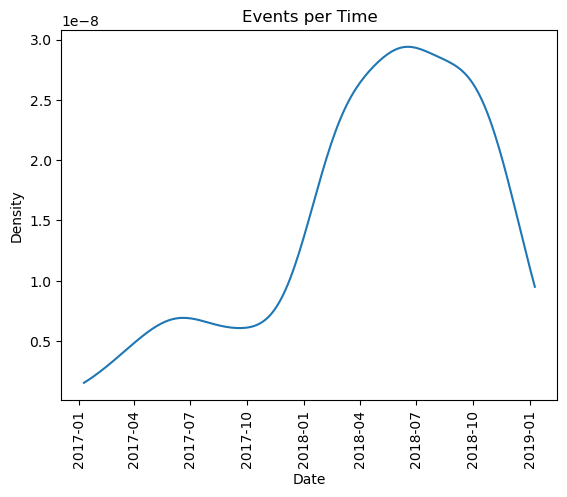

In [152]:
view_events_per_time_graph(log_i)

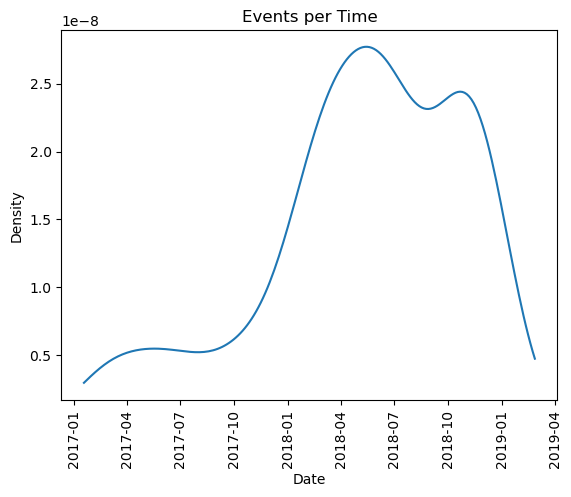

In [153]:
view_events_per_time_graph(log_d)

---
# Process Model(s)

## Top 6 and Top 5 Model (M)

In [154]:
def filter_top_n_variants(log, n):  # Filters and returns df containing the top n variants of a given logfile

    df = log
    variants = pm4py.get_variants(df, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
    variants = dict(sorted(variants.items(), key=lambda item: item[1], reverse=True))  # sort dictionary by value in descending order

    top_variants = [list(variants.items())[i] for i in range(n)]
    
    valid_cases_list = []
    for variant in top_variants:
        grouped = df.groupby('case:concept:name')['concept:name'].apply(list)
        valid_cases = grouped[grouped.apply(lambda x: all(item in x for item in variant[0]) and len(x) == len(variant[0]))].index
        valid_cases_list.extend(valid_cases)
    
    filtered_df = df[df['case:concept:name'].isin(valid_cases_list)]

    return filtered_df

In [155]:
log_i_top_6 = filter_top_n_variants(log_i, 6)
log_d_top_5 = filter_top_n_variants(log_d, 5)

## Petri Net or DFG (I)

## Start + End Activities (M)



In [156]:
def return_start_activities(log):
    start_activities = pm4py.get_start_activities(
        log, 
        activity_key='concept:name', 
        case_id_key='case:concept:name', 
        timestamp_key='time:timestamp')
    
    return start_activities

def return_end_activities(log):
    end_activities = pm4py.get_end_activities(
        log, 
        activity_key='concept:name', 
        case_id_key='case:concept:name', 
        timestamp_key='time:timestamp')
    
    return end_activities

In [157]:
print(return_start_activities(log_i))
print(return_start_activities(log_d))

print(return_end_activities(log_i))
print(return_end_activities(log_d))

{'Permit SUBMITTED by EMPLOYEE': 5294, 'Start trip': 740, 'Declaration SUBMITTED by EMPLOYEE': 407, 'Declaration SAVED by EMPLOYEE': 8}
{'Declaration SUBMITTED by EMPLOYEE': 10365, 'Declaration SAVED by EMPLOYEE': 135}
{'Payment Handled': 5646, 'End trip': 593, 'Declaration REJECTED by EMPLOYEE': 130, 'Declaration SAVED by EMPLOYEE': 54, 'Declaration REJECTED by MISSING': 11, 'Permit REJECTED by MISSING': 8, 'Request Payment': 3, 'Send Reminder': 2, 'Declaration FINAL_APPROVED by SUPERVISOR': 1, 'Declaration REJECTED by SUPERVISOR': 1}
{'Payment Handled': 10043, 'Declaration REJECTED by EMPLOYEE': 284, 'Declaration SAVED by EMPLOYEE': 134, 'Declaration REJECTED by MISSING': 30, 'Declaration REJECTED by ADMINISTRATION': 5, 'Declaration REJECTED by SUPERVISOR': 4}


## Fitness (M)

## Unexpected Behaviour (only one case of...) (M)


## Recycled applications (M)

## Differences between international and domestic application (I)

---
# Specific Questions

## How long do the different process instances take? Are there any notable patterns? (M)
- Average durations of the whole process
- Average duration of each activity
- Total duration of each activity 
> (Put visualization of avg + total durations next to each other)
- Unexpected behaviour: e.g. "Saved by employee" (dom)

### Average durations of the whole process

In [158]:
def avg_duration_of_cases(log):
    case_arr_avg = pm4py.get_case_arrival_average( #Gets the average difference between the start times of two consecutive cases
        log, 
        activity_key='concept:name', 
        case_id_key='case:concept:name', 
        timestamp_key='time:timestamp')
    return case_arr_avg  

In [159]:

duration_i = avg_duration_of_cases(log_i)
duration_d = avg_duration_of_cases(log_d)

print(f"International: {duration_i / 24} hours")
print(f"Domestic: {duration_d / 24} hours")

International: 447.0025136993383 hours
Domestic: 246.65215734831887 hours


The output above shows, that the average duration of the process for international travel is 447 hours. The Domestic Travel process, on the other hand, has a duration of 247 hours. The duration from the beginning to the end of each case was taken into account, based on which an average was calculated.

### Average and Total duration of each activity

Now let's look at the duration by individual activities. These can give us first indications of possible bottlenecks.

To do this, a duration is first calculated for each entry in the logfile and appended as a new column. Here, it is assumed that the duration of an activity is the difference between the current timestamp of one activity and the timestamp of the previous activity. Therefore, the first activity of each case has no duration and gets marked as ``NaT``. However, in order to calculate only the durations within a case per activity, the data set is grouped by Case ID ```('case:concept:name')``` beforehand. We want to make sure that the activities of each case are presented in the correct order, so we sort secondarily by timestamp ```('time:timestamp')```. We have applied this to both datasets. The first 5 lines of each output can be seen as follows:

In [160]:
log_i = log_i.sort_values(['case:concept:name', 'time:timestamp'])
log_i['duration'] = log_i.groupby('case:concept:name')['time:timestamp'].diff()  # difference of one timestamp to next between two activities of one case
log_i['duration'].fillna(pd.Timedelta(seconds=0), inplace=True)
log_i[:5]

,id,org:resource,concept:name,time:timestamp,org:role,case:Permit travel permit number,case:DeclarationNumber,case:Amount,case:RequestedAmount,case:Permit TaskNumber,case:Permit BudgetNumber,case:OriginalAmount,case:Permit ProjectNumber,case:concept:name,case:Permit OrganizationalEntity,case:travel permit number,case:Permit RequestedBudget,case:id,case:Permit ID,case:Permit id,case:BudgetNumber,case:Permit ActivityNumber,case:AdjustedAmount,duration
27174,st_step 1004_0,STAFF MEMBER,Permit SUBMITTED by EMPLOYEE,2018-03-01 09:55:17+00:00,EMPLOYEE,travel permit number 993,declaration number 1003,361.39224,361.39224,UNKNOWN,budget 994,361.39224,UNKNOWN,declaration 1002,organizational unit 65460,travel permit number 993,1273.252058,declaration 1002,travel permit 992,travel permit 992,budget 146827,activity 995,361.39224,0 days 00:00:00
27175,st_step 1005_0,STAFF MEMBER,Permit APPROVED by ADMINISTRATION,2018-03-01 09:55:21+00:00,ADMINISTRATION,travel permit number 993,declaration number 1003,361.39224,361.39224,UNKNOWN,budget 994,361.39224,UNKNOWN,declaration 1002,organizational unit 65460,travel permit number 993,1273.252058,declaration 1002,travel permit 992,travel permit 992,budget 146827,activity 995,361.39224,0 days 00:00:04
27176,st_step 1006_0,STAFF MEMBER,Permit FINAL_APPROVED by SUPERVISOR,2018-03-01 14:01:48+00:00,SUPERVISOR,travel permit number 993,declaration number 1003,361.39224,361.39224,UNKNOWN,budget 994,361.39224,UNKNOWN,declaration 1002,organizational unit 65460,travel permit number 993,1273.252058,declaration 1002,travel permit 992,travel permit 992,budget 146827,activity 995,361.39224,0 days 04:06:27
27177,rv_travel permit 992_6,STAFF MEMBER,Start trip,2018-03-18 23:00:00+00:00,EMPLOYEE,travel permit number 993,declaration number 1003,361.39224,361.39224,UNKNOWN,budget 994,361.39224,UNKNOWN,declaration 1002,organizational unit 65460,travel permit number 993,1273.252058,declaration 1002,travel permit 992,travel permit 992,budget 146827,activity 995,361.39224,17 days 08:58:12
27178,rv_travel permit 992_7,STAFF MEMBER,End trip,2018-03-22 23:00:00+00:00,EMPLOYEE,travel permit number 993,declaration number 1003,361.39224,361.39224,UNKNOWN,budget 994,361.39224,UNKNOWN,declaration 1002,organizational unit 65460,travel permit number 993,1273.252058,declaration 1002,travel permit 992,travel permit 992,budget 146827,activity 995,361.39224,4 days 00:00:00


In [161]:
log_d = log_d.sort_values(['case:concept:name', 'time:timestamp'])
log_d['duration'] = log_d.groupby('case:concept:name')['time:timestamp'].diff()  # difference of one timestamp to next between two activities of one case
log_d['duration'].fillna(pd.Timedelta(seconds=0), inplace=True)
log_d[:5]

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount,duration
12788,st_step 100004_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-01-30 08:20:07+00:00,EMPLOYEE,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,0 days 00:00:00
12789,st_step 100003_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2018-02-07 08:58:46+00:00,ADMINISTRATION,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,8 days 00:38:39
12790,st_step 100002_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2018-02-08 09:59:05+00:00,SUPERVISOR,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,1 days 01:00:19
12791,dd_declaration 100000_19,SYSTEM,Request Payment,2018-02-09 11:42:49+00:00,UNDEFINED,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,1 days 01:43:44
12792,dd_declaration 100000_20,SYSTEM,Payment Handled,2018-02-12 16:31:20+00:00,UNDEFINED,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,3 days 04:48:31


Now we can group the data set by activity ```('concept:name')```. Here the average duration is calculated using the ``mean()`` function.

In [162]:
def get_average_duration_per_activity(log):
    average_durations = log.groupby('concept:name')['duration'].mean()
    average_durations = average_durations.sort_values(ascending=False)
    return average_durations

Because we want to take into account not only the average duration, but also the total duration, we use ```sum()``` to sum up the duration per activity in a separate function.

In [180]:
def get_total_duration_per_activity(log):
    
    #log['duration_days'] = log['duration'].dt.days
    log['duration_seconds'] = log['duration'].dt.total_seconds()
    total_seconds_per_activity = log.groupby('concept:name')['duration_seconds'].sum()
    total_durations = pd.to_timedelta(total_seconds_per_activity, unit='s')

    #total_durations = log.groupby('concept:name')['duration'].sum()
    total_durations = total_durations.sort_values(ascending=False)
    log = log.drop('duration_seconds', axis = 1)
    return total_durations

In [195]:
get_average_duration_per_activity(log_i)

concept:name
Start trip                                 42 days 18:09:20.167933013
Send Reminder                              37 days 19:32:25.889400921
Permit REJECTED by DIRECTOR                          20 days 01:48:02
Declaration SAVED by EMPLOYEE              16 days 23:17:54.493333333
Permit REJECTED by MISSING                 15 days 09:22:15.232558139
Declaration SUBMITTED by EMPLOYEE          11 days 04:13:48.389307321
End trip                                    7 days 13:35:30.122344549
Declaration REJECTED by MISSING             4 days 19:46:32.466019417
Declaration REJECTED by DIRECTOR               4 days 19:03:13.250000
Declaration REJECTED by SUPERVISOR          3 days 19:40:59.690476190
Payment Handled                             3 days 13:26:20.920155164
Declaration REJECTED by EMPLOYEE            3 days 10:31:58.447752809
Request Payment                             3 days 04:40:55.815138282
Declaration FINAL_APPROVED by DIRECTOR      3 days 04:23:01.718253968
Declara

In [191]:
def visualize_durations(log):

    average_durations = get_average_duration_per_activity(log)
    average_durations_hours = average_durations.dt.total_seconds() / 3600 # Conversion to hours

    total_durations = get_total_duration_per_activity(log) 
    total_durations_days  = total_durations.dt.total_seconds() / 86400 # Conversions from seconds to days
    

    plt.figure(figsize=(24, 30))

    plt.subplot(2, 1, 1)

    sns.barplot(x=average_durations_hours.values, y=average_durations_hours.index, palette="viridis")

    plt.ylabel('Activity')
    plt.xlabel('Average Duration (hours)')
    plt.title('Average Duration for Each Activity in Hours')

    for i, value in enumerate(average_durations_hours.values):  # Display values next to the bars
        plt.text(value + 0.01 * value, i + 0.11, f"{value:.2f}", fontsize=14)

    plt.subplot(2, 1, 2)

    sns.barplot(x=total_durations_days.values, y=total_durations_days.index, palette="viridis")

    plt.ylabel('Activity')
    plt.xlabel('Total Duration (days)')
    plt.title('Total Duration for Each Activity in Days')

    for i, value in enumerate(total_durations_days.values):  # Display values next to the bars
        plt.text(value + 0.01 * value, i + 0.11, f"{value:.2f}", fontsize=14)

    plt.show();

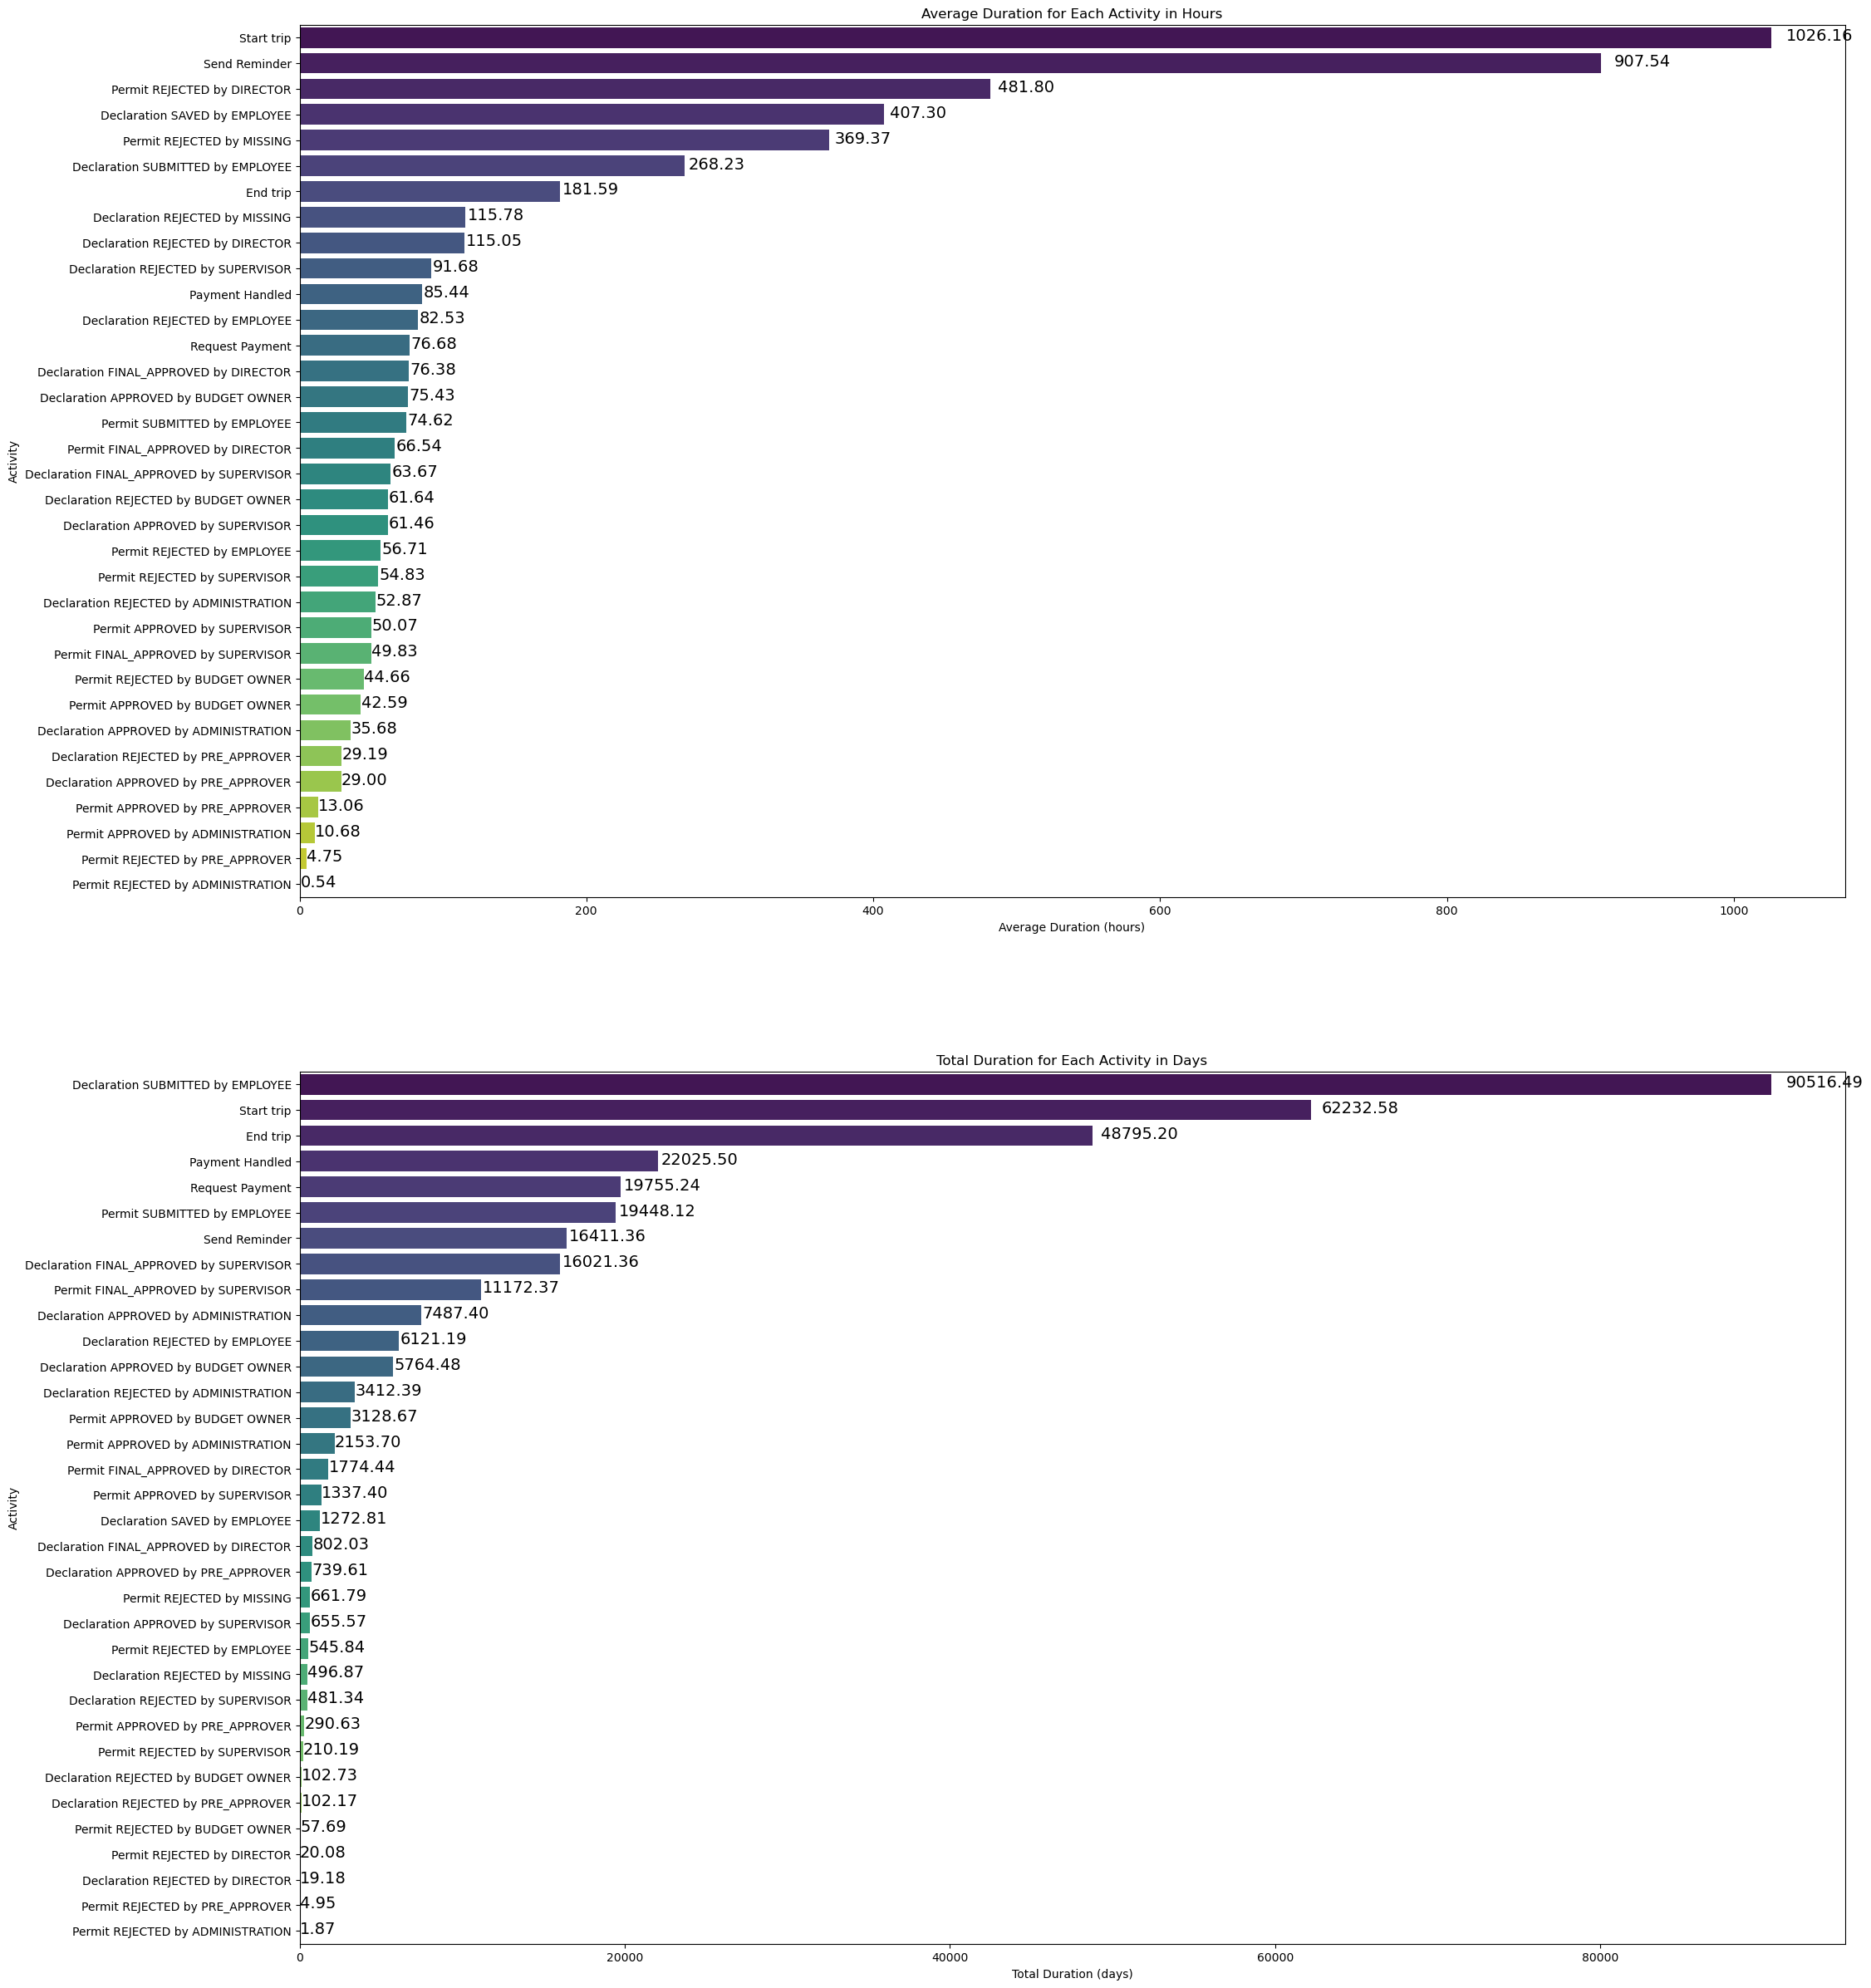

In [196]:
visualize_durations(log_i)

As shown in the graph above, two barplots are shown for the Average Duration for each Activity and the Total duration for each Activity. This one was generated based on the data set ``log_i`` for international travel. The following one was generated accordingly based on the date set ``log_d`` for domestic travel.

When examining average durations, the activity ``'Start trip'`` has a high average duration of about 42.5 days or 1026 hours. This is followed by the ``'Send Reminder'`` activity which averages close to 38 days with about 900 hours. The third position in terms of length is occupied by the ``'Permit REJECTED by DIRECTOR'`` activity, which typically spans around 481 hours or 20 days. These considerable durations indicate areas in the process where tasks might be encountering significant delays.

On the other hand, when we consider the total durations, the activity ```'Declaration SUBMITTED by EMPLOYEE'``` accumulates to 90516 days. This suggests that even though its average duration of 268 hours or 11 days isn't the highest, the activity occurs frequently. The ``'Start trip'`` activity has a total of 62232 days, and the ``'End trip'`` activity accumulates 48795 days.

Furthermore, some activities, like ``'Permit REJECTED by ADMINISTRATION'``, show a relatively short total duration when compared to their average durations, hinting that they might not occur frequently. The varying durations across activities related to approvals and rejections by different entities such as the ``'DIRECTOR'``, ``'SUPERVISOR'``, and ``'ADMINISTRATION'`` might point to inconsistencies in the process or differing priorities among these roles.

One can observe, that activities related to permit approval or rejection by various entities, such as the ``'DIRECTOR'`` or ``'MISSING'``, tend to have longer average durations. This might indicate that the permit approval process is a key area that could benefit from optimization. Moreover, while the Declaration ``'REJECTED by MISSING'`` activity has an average duration of approximately 114 hours or approxemately 5 days , its total duration is 496 days. This suggests that the frequency of such rejections is high, potentially pointing to issues with data or information quality. On the flip side, activities like ``'Permit REJECTED by ADMINISTRATION'`` and ``'Permit REJECTED by PRE_APPROVER'`` exhibit shorter average durations, hinting at a swifter rejection process in these scenarios.

Moreover, while activities like Declaration ``'SAVED by EMPLOYEE'`` and ``'Permit REJECTED by MISSING'`` might individually take time, they don't seem to occur as frequently as others, given their absence from the top total durations. Lastly, there's a noticeable variation in the durations for activities related to ``'Permit'``. For example, ``'Permit REJECTED by DIRECTOR'``  averages 481 hours, while ``'Permit REJECTED by PRE_APPROVER'`` averages just about 4.75 hours.

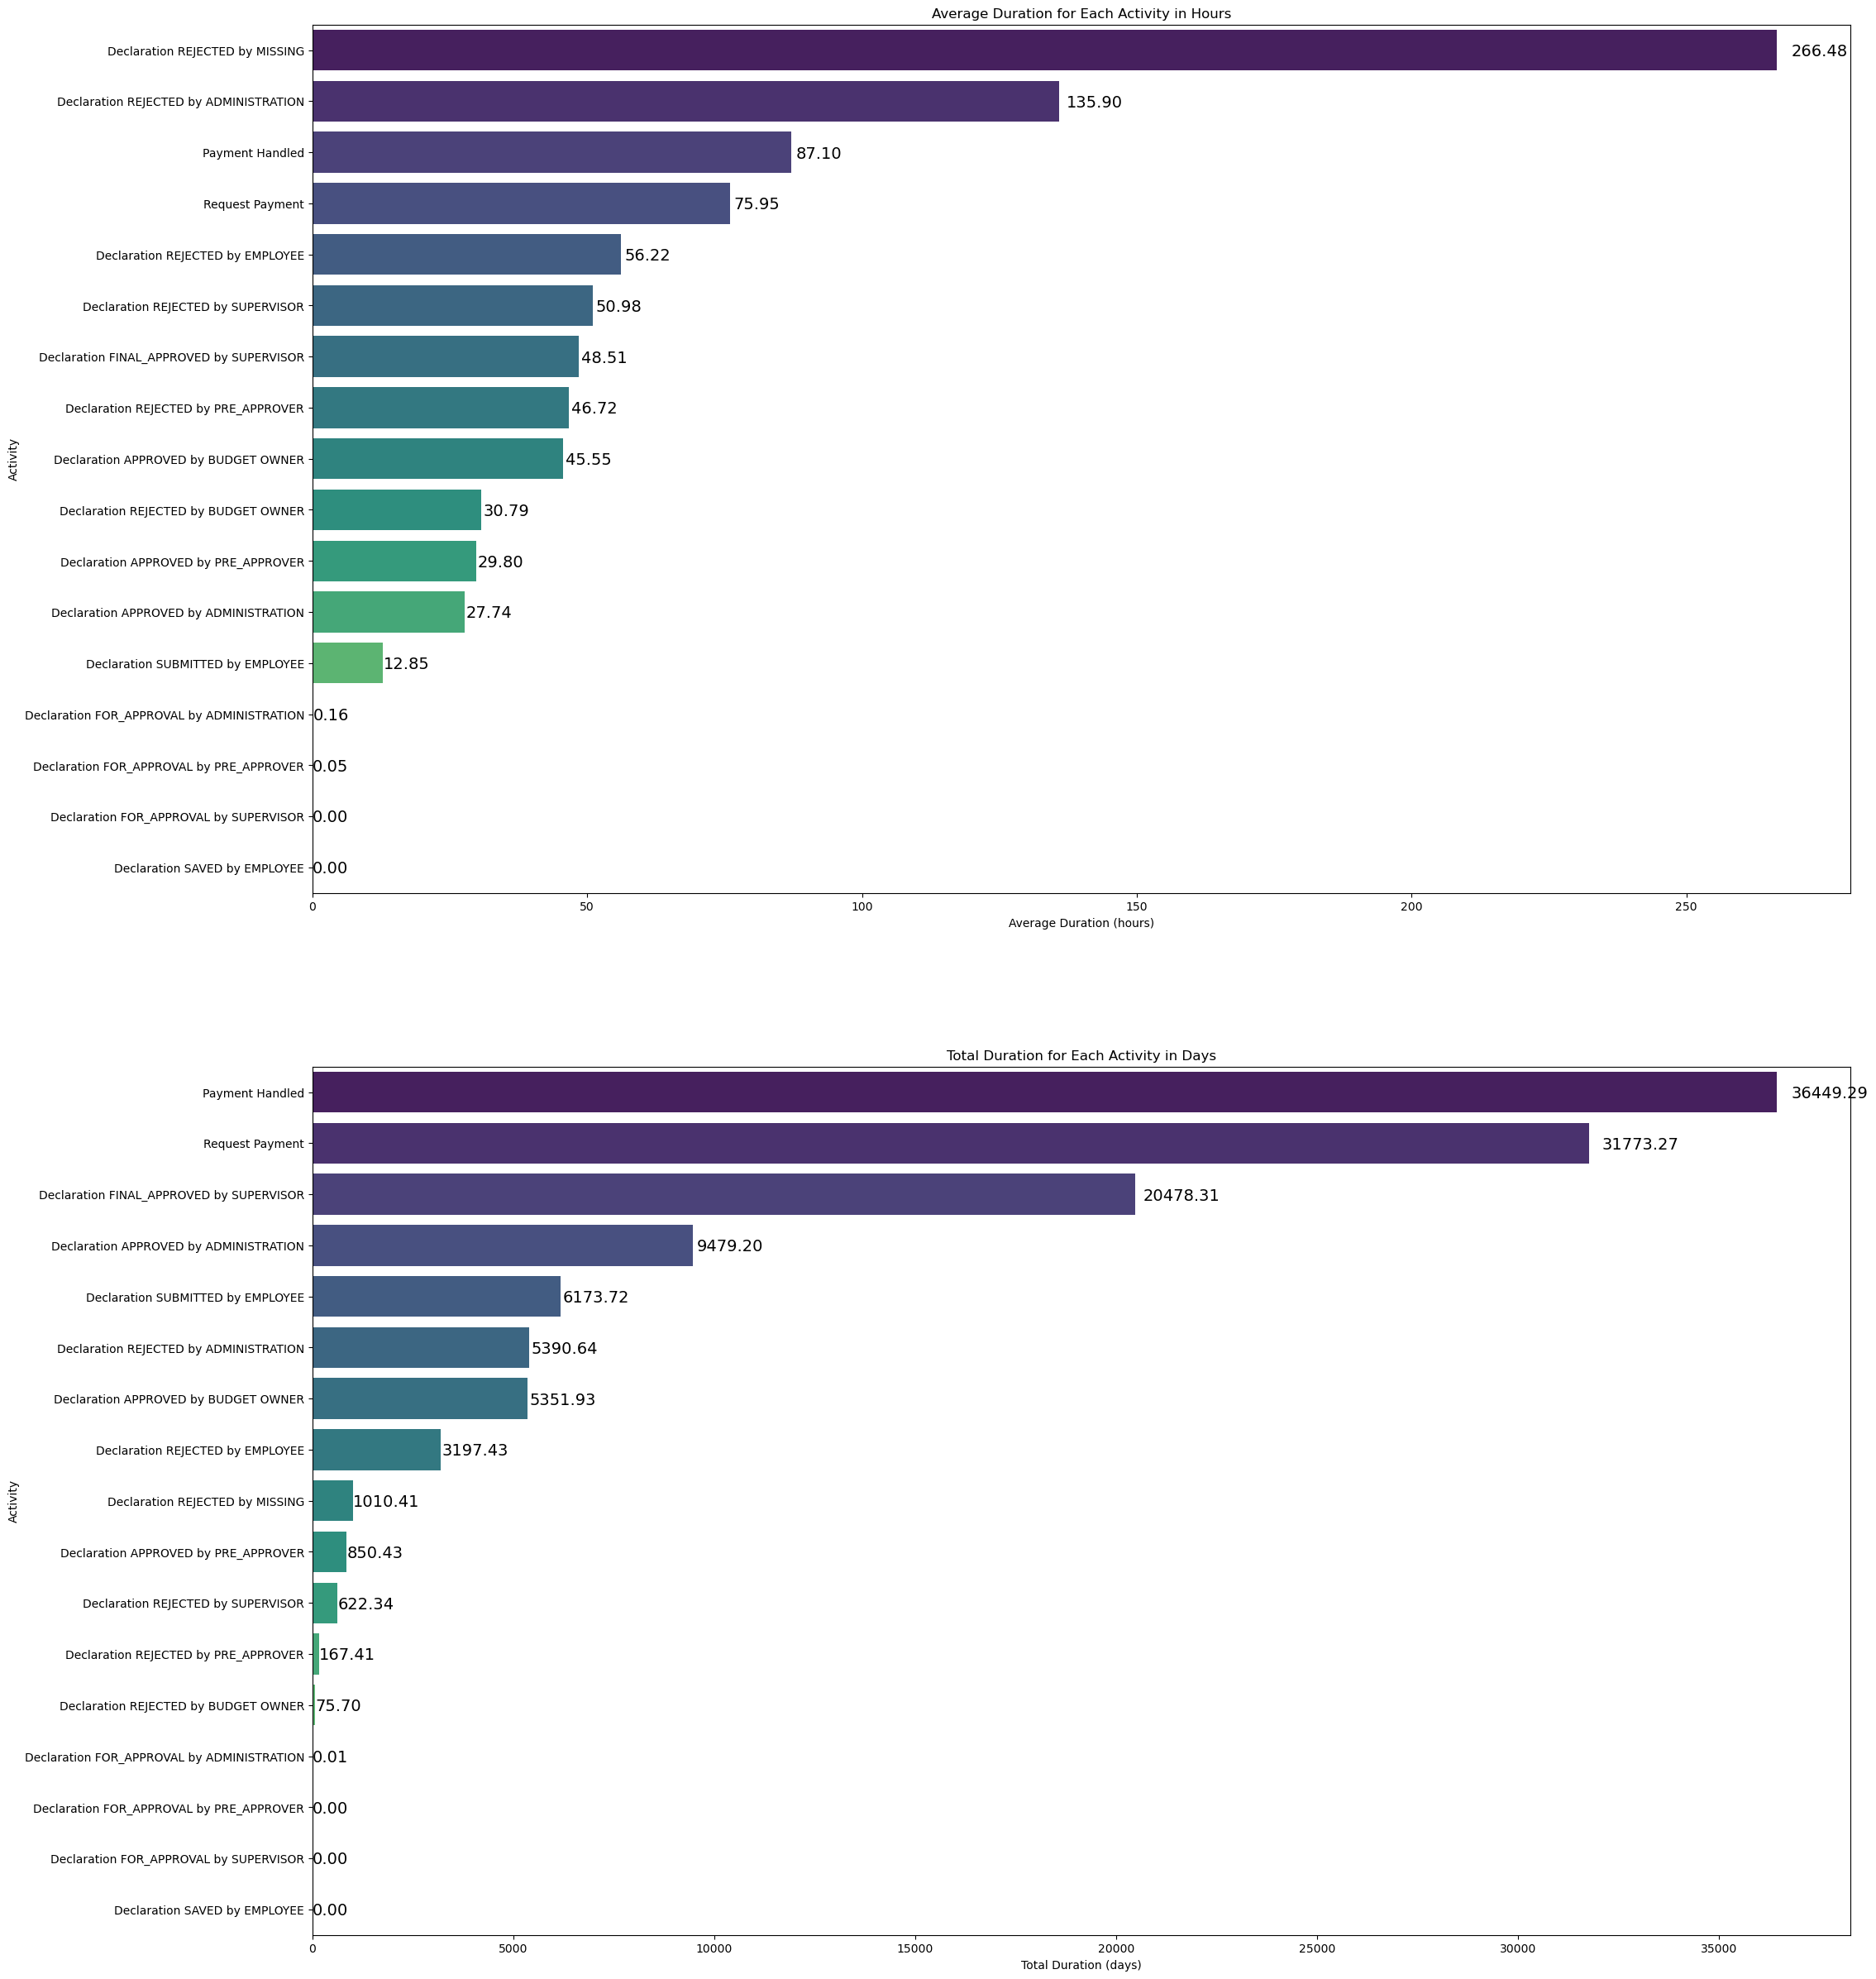

In [192]:
visualize_durations(log_d)

The activity with the longest average duration is ``'Declaration REJECTED by MISSING'``, which takes an average of 266 hours or approximately 11 days. This duration suggests a significant delay when items are rejected by an here unknown role. The next activity with a long average duration is ``'REJECTED by ADMINISTRATION'``, taking with 135 hours about 5 days and 16 hours, indicating another potential area of inefficiency. The activity ``'Payment Handled'`` has an average duration of approximately 3.5 days. Given that this is a crucial step in most processes, it's worth investigating why it takes such a long time.

A glance at the chart for total duration offers new insights. The most time consuming activities are the those handled by the resource ``'SYSTEM'``, which are ``'Request Payment'`` and ``'Payment Handled'``.  The latter is at the top with a total of 36449 days, making it the most time-consuming activity overall. The activity ``'FINAL_APPROVED by SUPERVISOR'`` has a total duration of 20478 days, suggesting that while its average duration isn't the longest, it occurs frequently and thus accumulates significant time. Request Payment is also notable with a total duration of 31773 days. As the starting activity of most cases the value for ``'SUBMITTED by EMPLOYEE'`` usually should be ``NaT`` or ``0``. But in this diagramm the total duration for ``'SUBMITTED by EMPLOYEE'`` represents the durations of those recycled declrations coming back from rejected declarations. 

Another interesting observation is that activities like ``'FOR_APPROVAL by ADMINISTRATION'``, ``'FOR_APPROVAL by PRE_APPROVER'``, and ``'FOR_APPROVAL by SUPERVISOR'`` have very short average durations, implying that the initial approval process is quick. However, the subsequent approval or rejection might be causing delays. 

In [167]:
def show_scatterplot_of_durations(log):

    log["duration_hours"] = log["duration"].dt.total_seconds() / 3600

    plt.figure(figsize=(24, 12))
    sns.scatterplot(x="duration_hours", y="concept:name", data=log, palette="viridis")
    plt.xlabel('Duration (hours)')
    plt.ylabel('Role')
    plt.title('Scatterplot of duration for Each Activity in hours')

    plt.xticks(rotation=45, ha='center',ticks=range(0, int(18000)+100, 500))
    plt.grid(True);

In [168]:
#show_scatterplot_of_durations(log_i)

In [169]:
#show_scatterplot_of_durations(log_d)

## Are there any bottlenecks? If yes, where? If yes, can you think of any reasons? (M)
- dfg graph with durations
- insights from dfg
- insight from diso

## How many applications get rejected? Can you find any reasons? (M)
- amount of rejection total
- amount of rejections based on role
- boxplot rejquested amount of rejected delcarations by role
- boxplot rejquested amount of approved delcarations by role
- Distribution of requested amount of rejected vs approved cases

### Amount of rejections
First we take a look at the total total amount of rejections. Here we filter those activities containing ``'REJECTED'``. The filtered data set cotains now rejections by certain role and ```'REJECTED by EMPLOYEE'```. However, most rejections of a certain role lead to the activity ``'REJECTED by EMPLOYEE'``. Therefore, it is sufficient for the time being to filter for all activities that contain ``'REJECTED by EMPLOYEE'``. The output of the amount of rejected application of each data set can be seen below.

In [170]:

log_i_r = log_i[log_i["concept:name"].str.contains('REJECTED by EMPLOYEE')]  # Includes Rejections of Permits
log_d_r = log_d[log_d["concept:name"].str.contains('REJECTED by EMPLOYEE')]


len_log_i_r = len(log_i_r)
len_log_d_r = len(log_d_r)
len_unique_case_i = len(log_i['case:concept:name'].unique())
len_unique_case_d = len(log_d['case:concept:name'].unique())


print(f"Amount of rejected applications for international travel: {len_log_i_r}")
print(f"Amount of rejected applications for domestic travel: {len_log_d_r}")
print("-"*75)
print(f"Amount of unique cases for international travel: {len_unique_case_i}")
print(f"Amount of unique cases for domestic travel: {len_unique_case_d}")
print("-"*75)
print(f"Rejection rate for for international travel: {(len_log_i_r/len_unique_case_i)*100}%")
print(f"Rejection rate for for domestic travel: {(len_log_d_r/len_unique_case_d)*100}%")

Amount of rejected applications for international travel: 2011
Amount of rejected applications for domestic travel: 1365
---------------------------------------------------------------------------
Amount of unique cases for international travel: 6449
Amount of unique cases for domestic travel: 10500
---------------------------------------------------------------------------
Rejection rate for for international travel: 31.183129167312764%
Rejection rate for for domestic travel: 13.0%


On the one hand, for international travel, there were a total of ``2011`` applications that did not receive approval. The data set for international travel has ``6449`` unique cases. From this pool, the rejection rate was about ``31.18%``, indicating that nearly one-third of the individuals who sought to travel internationally encountered rejection.

On the other hand, for domestic travel, ``1365`` applications were not approved. In contast to international travel the unique cases for domestic travel, amounts to ``10500``. This could be a sign of a greater demand or inclination to travel within the country. Even with the larger number of unique cases, the rejection rate for domestic travel was significantly lower than its international counterpart, standing at ``13%``.

The contrasting rejection rates could be due to more stringent regulations associated with international travel, the intricacies of documentation requirements, or the sheer volume of applicants.

### Amount of rejections based on role

In [171]:
def visualize_amount_of_rejections_by_role(log_r):

    ax = sns.countplot(x='org:role', data=log_r, palette='viridis')
    ax.set(title='Amount of Rejections by Role', xlabel='', ylabel='')
    plt.xticks(rotation=45, ha='right')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline')  # centering text

In [172]:
log_i_r = log_i[log_i["concept:name"].str.contains('REJECTED')]  # Contains all activities with "REJECTED" in its name, including "REJECTED by EMPLOYEE"
log_d_r = log_d[log_d["concept:name"].str.contains('REJECTED')]

log_i_r = log_i_r[log_i_r['org:role'] != 'EMPLOYEE']   # Filtering out the EMPLOYEE role because most rejected declartions by a certain role are getting followed up by the activity "REJECTED by EMPLOYEE"
log_d_r = log_d_r[log_d_r['org:role'] != 'EMPLOYEE'] 

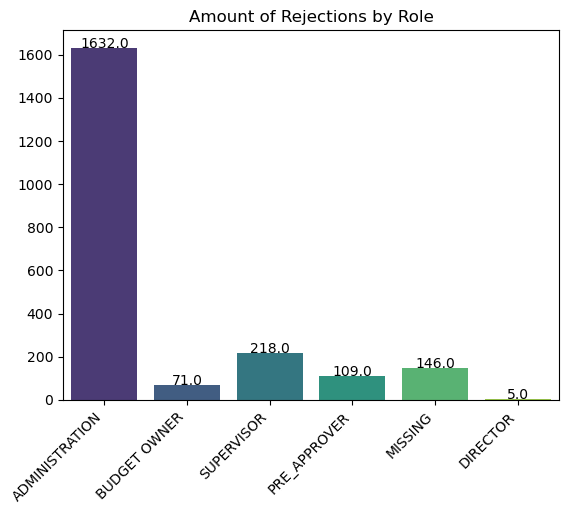

In [173]:
visualize_amount_of_rejections_by_role(log_i_r)

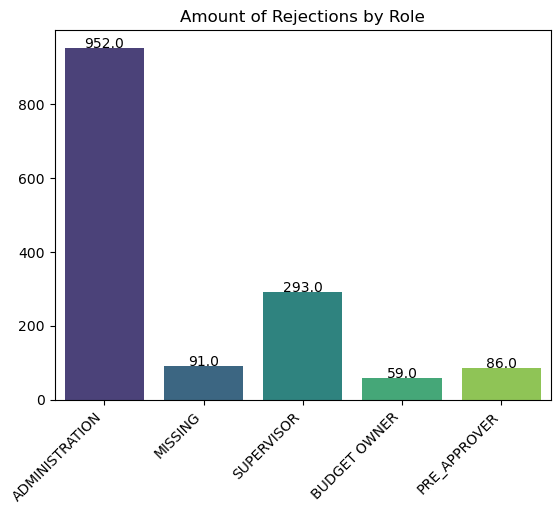

In [174]:
visualize_amount_of_rejections_by_role(log_d_r)

- boxplot rejquested amount of rejected delcarations by role
- boxplot rejquested amount of approved delcarations by role

## Are there any patterns that would suggest non-conformance?
- TBD

## Social Network / Handover Network
- TBD

---
## What is missing to provide more detailed insights into the processes?
- TBD

## Reflect on where supervised / unsupervised machine learning techniques could help to obtain further insights.
- TBD

## Can you think of useful KPIs for the processes?
- TBD

## Make specific recommendations for improving the processes.
- TBD

---
# Conclusion